# Tesla stock price over time

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

In [114]:
stock = pd.read_csv('TESLAHistoricalQuotes.csv')
stock = stock.drop(0,0)

In [115]:
# Fix up the date column
stock.date = pd.to_datetime(stock.date)
stock = stock.sort_values('date')

In [117]:
stock.set_index(stock.date, inplace=True)
stock = stock.drop('date', 1)

In [118]:
stock.head()

,close,volume,open,high,low
date,,,,,
2010-06-29,23.89,18751150.0000,19.00,25.0000,17.54
2010-06-30,23.83,17165210.0000,25.79,30.4192,23.30
2010-07-01,21.96,8216789.0000,25.00,25.9200,20.27
2010-07-02,19.20,5135795.0000,23.00,23.1000,18.71
2010-07-06,16.11,6858092.0000,20.00,20.0000,15.83


In [60]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # This can be fine tuned.  There is some relationship, but hard to quantify.
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

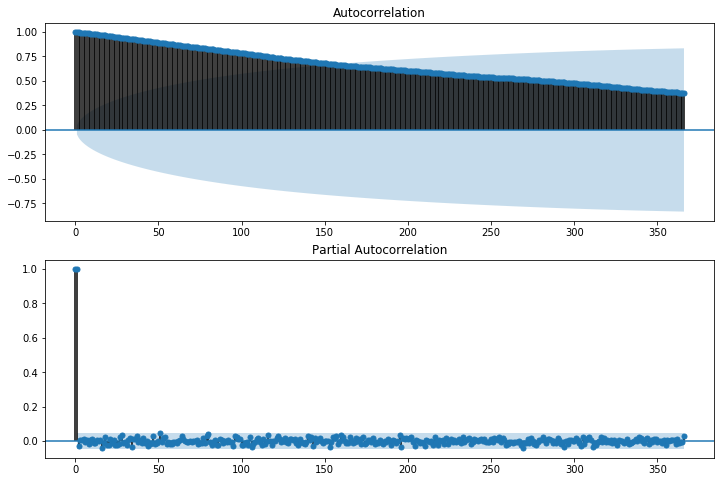

In [119]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock.close, lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.close, lags=366, ax=ax2)
plt.show()

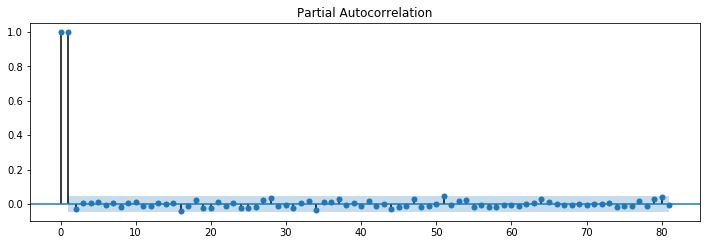

In [120]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.close, lags=81, ax=ax2)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


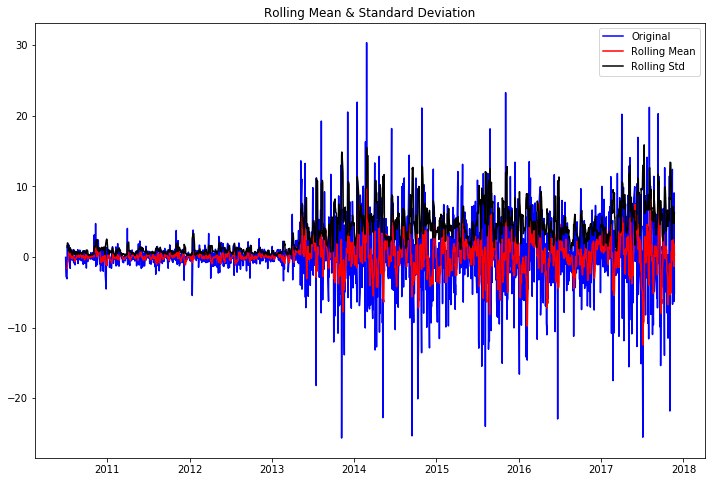

Results of Dickey-Fuller Test:
Test Statistic                  -41.680905
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1864.000000
Critical Value (1%)              -3.433863
Critical Value (5%)              -2.863092
Critical Value (10%)             -2.567596
dtype: float64


In [121]:
stock['first_difference'] = stock.close - stock.close.shift(1)  
test_stationarity(stock.first_difference.dropna(inplace=False))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


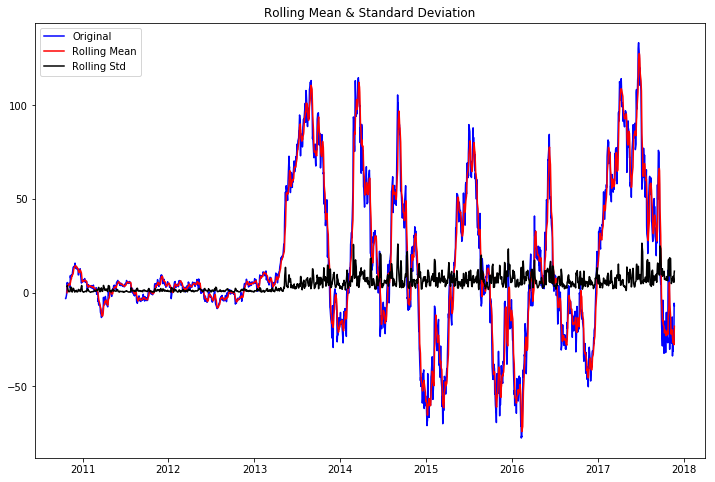

Results of Dickey-Fuller Test:
Test Statistic                   -3.847570
p-value                           0.002456
#Lags Used                        2.000000
Number of Observations Used    1783.000000
Critical Value (1%)              -3.434023
Critical Value (5%)              -2.863162
Critical Value (10%)             -2.567634
dtype: float64


In [122]:
stock['season_80'] = stock.close - stock.close.shift(80)  
test_stationarity(stock.season_80.dropna(inplace=False))

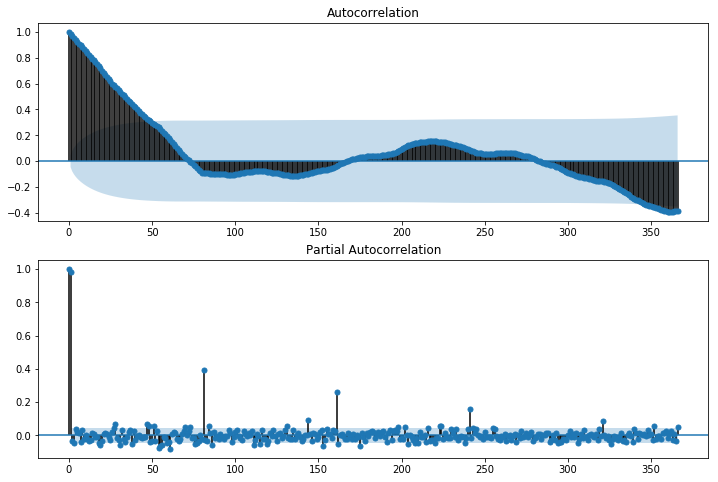

In [123]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock.season_80.iloc[80:], lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.season_80.iloc[80:], lags=366, ax=ax2)
plt.show()

WOW. Season 80 it is.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


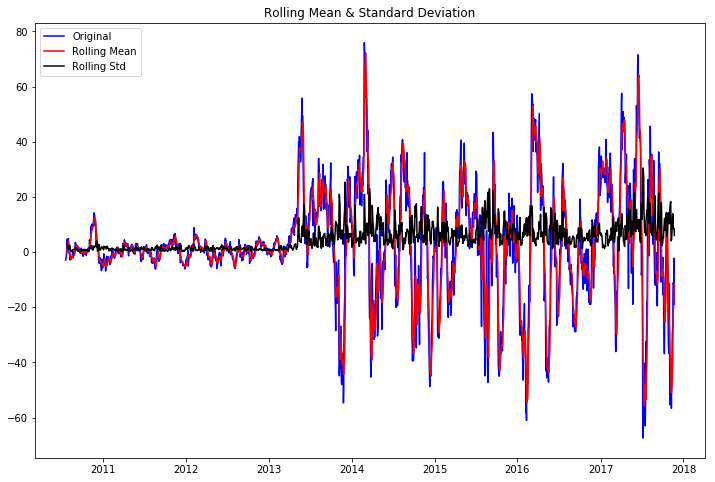

Results of Dickey-Fuller Test:
Test Statistic                -7.457554e+00
p-value                        5.461482e-11
#Lags Used                     2.400000e+01
Number of Observations Used    1.825000e+03
Critical Value (1%)           -3.433938e+00
Critical Value (5%)           -2.863125e+00
Critical Value (10%)          -2.567614e+00
dtype: float64


In [124]:
stock['season_16'] = stock.close - stock.close.shift(16)  
test_stationarity(stock.season_16.dropna(inplace=False))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  import sys


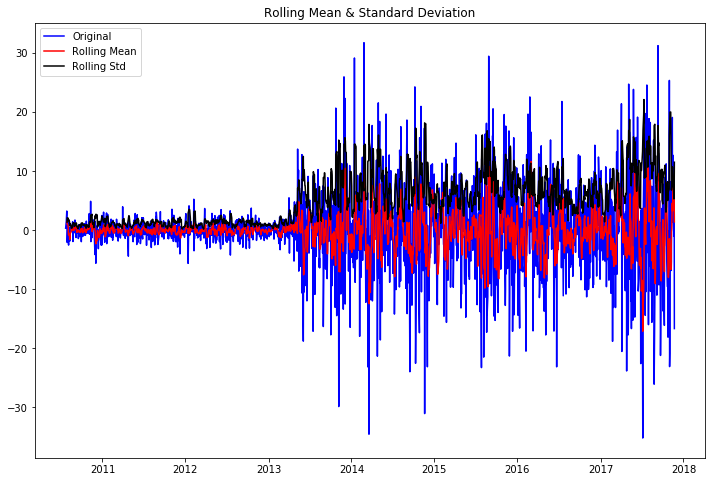

Results of Dickey-Fuller Test:
Test Statistic                -1.833620e+01
p-value                        2.250735e-30
#Lags Used                     1.500000e+01
Number of Observations Used    1.833000e+03
Critical Value (1%)           -3.433923e+00
Critical Value (5%)           -2.863118e+00
Critical Value (10%)          -2.567610e+00
dtype: float64


In [125]:
stock['season_16_diff'] = stock.first_difference - stock.first_difference.shift(16)  
test_stationarity(stock.season_16_diff.dropna(inplace=False))

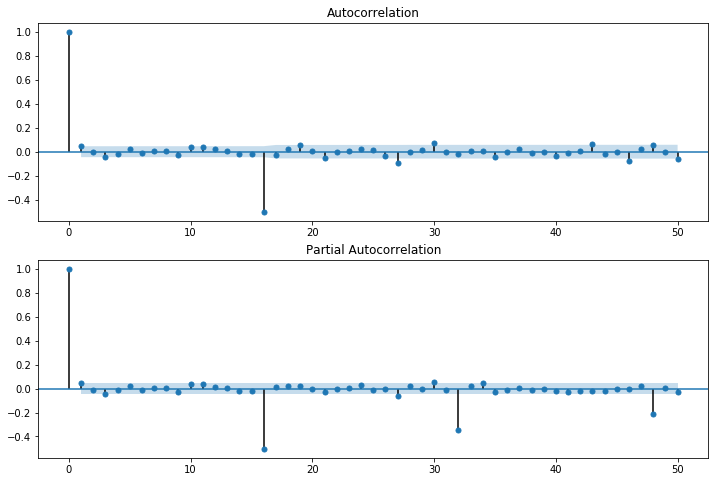

In [126]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock.season_16_diff.iloc[18:], lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.season_16_diff.iloc[18:], lags=50, ax=ax2)
plt.show()

In [127]:
mod_80 = sm.tsa.statespace.SARIMAX(stock.close, trend='n', order=(1,1,5), seasonal_order=(0,1,1,80))
results_80 = mod_80.fit()
results_80.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              close   No. Observations:                 1866
Model:             SARIMAX(1, 1, 5)x(0, 1, 1, 80)   Log Likelihood               -5455.601
Date:                            Mon, 18 Dec 2017   AIC                          10927.201
Time:                                    13:14:47   BIC                          10971.454
Sample:                                06-29-2010   HQIC                         10943.507
                                     - 11-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2079      1.170     -0.178      0.859      -2.501       2.085
ma.L1          0.2417      1.170      0.207      0.836      -2.052       2.535
ma.L2          0.0275      0.044      0.627      0.531      -0.058       0.113
ma.L3         -0.0390      0.031     -1.250      0.211      -0.100       0.022
ma.L4         -0.0295      0.053     -0.552      0.581      -0.134       0.075
ma.L5          0.0116      0.035      0.330      0.741      -0.058       0.081
ma.S.L80      -0.9999     20.277     -0.049      0.961     -40.741      38.741
sigma2        23.0056    466.236      0.049      0.961    -890.800     936.811
===================================================================================
Ljung-Box (Q):                       32.28   Jarque-Bera (JB):              1840.10
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              40.23   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
mod_16 = sm.tsa.statespace.SARIMAX(stock.close, trend='n', order=(1,1,5), seasonal_order=(0,1,3,16))
results_16 = mod_16.fit()
results_16.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              close   No. Observations:                 1866
Model:             SARIMAX(1, 1, 5)x(0, 1, 3, 16)   Log Likelihood               -5561.022
Date:                            Mon, 18 Dec 2017   AIC                          11142.043
Time:                                    14:57:48   BIC                          11197.359
Sample:                                06-29-2010   HQIC                         11162.425
                                     - 11-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0420      1.425      0.030      0.976      -2.750       2.834
ma.L1         -0.0064      1.426     -0.005      0.996      -2.801       2.788
ma.L2          0.0101      0.054      0.186      0.853      -0.096       0.116
ma.L3         -0.0441      0.024     -1.816      0.069      -0.092       0.004
ma.L4         -0.0205      0.063     -0.325      0.746      -0.144       0.103
ma.L5          0.0151      0.037      0.408      0.683      -0.058       0.088
ma.S.L16      -0.9946      0.050    -19.839      0.000      -1.093      -0.896
ma.S.L32      -0.0019      0.028     -0.067      0.946      -0.056       0.052
ma.S.L48      -0.0012      0.020     -0.062      0.951      -0.040       0.038
sigma2        23.0331      1.173     19.637      0.000      20.734      25.332
===================================================================================
Ljung-Box (Q):                       33.03   Jarque-Bera (JB):              2374.39
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              40.14   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
mod = sm.tsa.statespace.SARIMAX(stock.close, trend='n', order=(14,1,0), seasonal_order=(0,0,0,0))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  close   No. Observations:                 1866
Model:              SARIMAX(14, 1, 0)   Log Likelihood               -5564.759
Date:                Mon, 18 Dec 2017   AIC                          11159.517
Time:                        14:55:00   BIC                          11242.490
Sample:                    06-29-2010   HQIC                         11190.090
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0357      0.017      2.086      0.037       0.002       0.069
ar.L2          0.0132      0.020      0.668      0.504      -0.026       0.052
ar.L3         -0.0434      0.017     -2.513      0.012      -0.077      -0.010
ar.L4         -0.0213      0.019     -1.122      0.262      -0.059       0.016
ar.L5          0.0182      0.021      0.886      0.376      -0.022       0.058
ar.L6         -0.0036      0.020     -0.178      0.858      -0.044       0.036
ar.L7          0.0008      0.018      0.045      0.964      -0.034       0.035
ar.L8          0.0324      0.019      1.714      0.087      -0.005       0.069
ar.L9         -0.0216      0.018     -1.188      0.235      -0.057       0.014
ar.L10         0.0183      0.018      1.040      0.298      -0.016       0.053
ar.L11         0.0160      0.018      0.887      0.375      -0.019       0.051
ar.L12         0.0065      0.017      0.383      0.702      -0.027       0.040
ar.L13        -0.0187      0.019     -1.006      0.315      -0.055       0.018
ar.L14         0.0112      0.020      0.571      0.568      -0.027       0.050
sigma2        22.8665      0.400     57.232      0.000      22.083      23.650
===================================================================================
Ljung-Box (Q):                       28.90   Jarque-Bera (JB):              2479.37
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              39.64   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
mod = sm.tsa.statespace.SARIMAX(stock.close, trend='n', order=(3,1,30), seasonal_order=(0,0,0,0))
results = mod.fit()
results.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  close   No. Observations:                 1866
Model:              SARIMAX(3, 1, 30)   Log Likelihood               -5554.475
Date:                Mon, 18 Dec 2017   AIC                          11176.950
Time:                        14:35:33   BIC                          11365.022
Sample:                    06-29-2010   HQIC                         11246.248
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3508      0.369     -0.950      0.342      -1.074       0.373
ar.L2         -0.1424      0.415     -0.343      0.732      -0.956       0.671
ar.L3          0.0990      0.366      0.271      0.787      -0.617       0.815
ma.L1          0.3852      0.371      1.039      0.299      -0.341       1.112
ma.L2          0.1710      0.422      0.405      0.685      -0.656       0.998
ma.L3         -0.1252      0.374     -0.335      0.738      -0.858       0.607
ma.L4         -0.0394      0.026     -1.488      0.137      -0.091       0.012
ma.L5         -0.0006      0.030     -0.021      0.983      -0.059       0.057
ma.L6          0.0065      0.028      0.230      0.818      -0.049       0.062
ma.L7          0.0065      0.022      0.300      0.764      -0.036       0.049
ma.L8          0.0328      0.022      1.518      0.129      -0.010       0.075
ma.L9         -0.0158      0.025     -0.644      0.519      -0.064       0.032
ma.L10         0.0142      0.024      0.601      0.548      -0.032       0.061
ma.L11         0.0117      0.024      0.498      0.619      -0.034       0.058
ma.L12         0.0266      0.022      1.208      0.227      -0.017       0.070
ma.L13        -0.0137      0.025     -0.544      0.587      -0.063       0.036
ma.L14         0.0009      0.024      0.038      0.970      -0.045       0.047
ma.L15        -0.0222      0.022     -1.018      0.309      -0.065       0.021
ma.L16        -0.0077      0.025     -0.314      0.753      -0.056       0.040
ma.L17        -0.0028      0.024     -0.115      0.908      -0.050       0.044
ma.L18         0.0389      0.021      1.888      0.059      -0.001       0.079
ma.L19         0.0254      0.023      1.104      0.270      -0.020       0.071
ma.L20        -0.0189      0.027     -0.694      0.488      -0.072       0.034
ma.L21        -0.0476      0.026     -1.830      0.067      -0.099       0.003
ma.L22        -0.0213      0.029     -0.730      0.465      -0.078       0.036
ma.L23         0.0066      0.032      0.209      0.835      -0.055       0.069
ma.L24         0.0263      0.026      1.027      0.304      -0.024       0.076
ma.L25        -0.0047      0.022     -0.216      0.829      -0.048       0.038
ma.L26        -0.0296      0.021     -1.406      0.160      -0.071       0.012
ma.L27        -0.0800      0.024     -3.337      0.001      -0.127      -0.033
ma.L28        -0.0176      0.035     -0.499      0.618      -0.087       0.052
ma.L29         0.0017      0.036      0.046      0.963      -0.069       0.073
ma.L30         0.0609      0.031      1.962      0.050    6.39e-05       0.122
sigma2        22.6529      0.424     53.447      0.000      21.822      23.484
===================================================================================
Ljung-Box (Q):                        8.35   Jarque-Bera (JB):              2432.16
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              38.68   Skew:                

In [147]:
mod = sm.tsa.statespace.SARIMAX(stock.close, trend='n', order=(1,1,3), seasonal_order=(0,1,1,80))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              close   No. Observations:                 1866
Model:             SARIMAX(1, 1, 3)x(0, 1, 1, 80)   Log Likelihood               -5456.155
Date:                            Mon, 18 Dec 2017   AIC                          10924.310
Time:                                    15:06:34   BIC                          10957.499
Sample:                                06-29-2010   HQIC                         10936.539
                                     - 11-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2551      0.425      0.601      0.548      -0.577       1.087
ma.L1         -0.2205      0.425     -0.518      0.604      -1.054       0.613
ma.L2          0.0068      0.027      0.253      0.800      -0.046       0.059
ma.L3         -0.0481      0.018     -2.700      0.007      -0.083      -0.013
ma.S.L80      -0.9995      2.558     -0.391      0.696      -6.013       4.014
sigma2        22.9819     58.554      0.392      0.695     -91.782     137.746
===================================================================================
Ljung-Box (Q):                       33.16   Jarque-Bera (JB):              1844.42
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              40.33   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
# cut out 2017 data
1866-226

1640

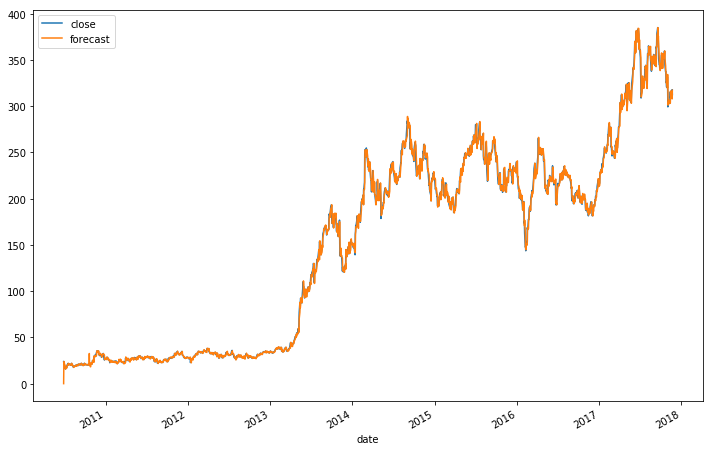

In [129]:
stock['forecast'] = results.predict(dynamic=False)
stock[['close', 'forecast']].plot(figsize=(12, 8)) 
plt.show()

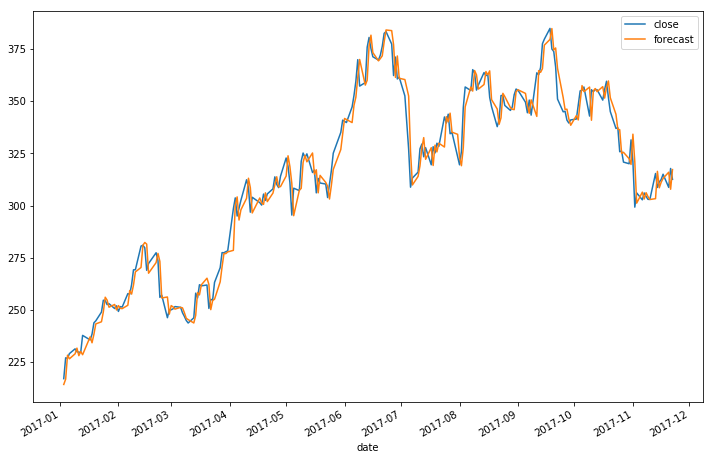

In [130]:
stock[['close', 'forecast']].iloc[1640:].plot(figsize=(12, 8)) 
plt.show()

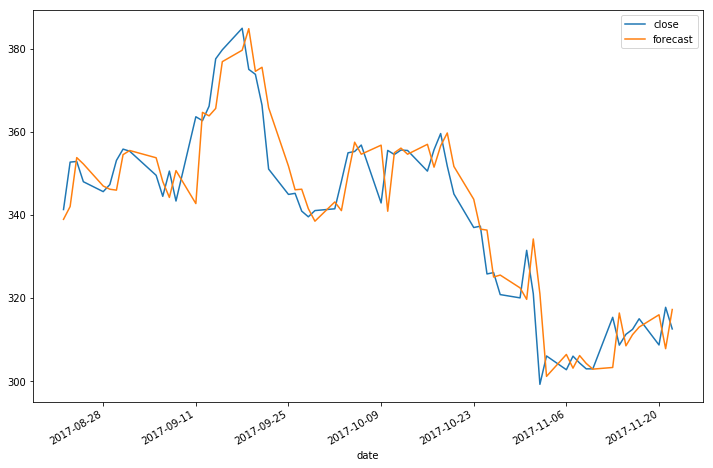

In [131]:
stock[['close', 'forecast']].iloc[1800:].plot(figsize=(12, 8)) 
plt.show()

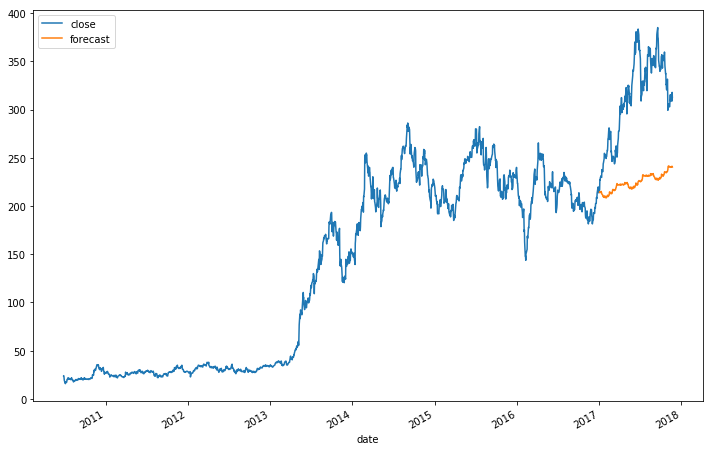

In [132]:
stock['forecast'] = [np.NaN for i in range(1640)] + list(results.predict(start=1640, end=1865, dynamic=True))
stock[['close', 'forecast']].plot(figsize=(12, 8)) 
plt.show()

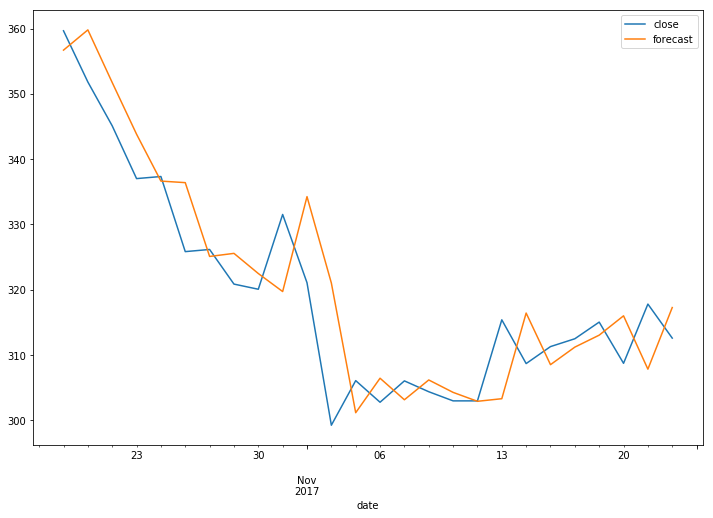

In [139]:
stock['forecast'] = [np.NaN for i in range(1840)] + list(results.predict(start=1840, end=1865, dynamic=False))
stock[['close', 'forecast']].iloc[1840:].plot(figsize=(12, 8)) 
plt.show()

In [ ]:
#Basically I'm a day behind; always.

In [142]:
from statsmodels.tsa.arima_model import ARIMA

In [143]:
mod = ARIMA(stock.close, order=(3,1,3))
results = mod.fit()
results.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1865
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5563.440
Method:                       css-mle   S.D. of innovations              4.778
Date:                Mon, 18 Dec 2017   AIC                          11142.879
Time:                        14:33:14   BIC                          11187.128
Sample:                    06-30-2010   HQIC                         11159.184
                         - 11-22-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1505      0.110      1.366      0.172      -0.065       0.366
ar.L1.D.close     0.0586      0.082      0.716      0.474      -0.102       0.219
ar.L2.D.close    -0.0584      0.080     -0.728      0.466      -0.216       0.099
ar.L3.D.close    -0.9152      0.081    -11.344      0.000      -1.073      -0.757
ma.L1.D.close    -0.0512      0.086     -0.592      0.554      -0.221       0.118
ma.L2.D.close     0.0614      0.083      0.740      0.459      -0.101       0.224
ma.L3.D.close     0.8966      0.084     10.702      0.000       0.732       1.061
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5045           -0.8740j            1.0092           -0.1667
AR.2            0.5045           +0.8740j            1.0092            0.1667
AR.3           -1.0729           -0.0000j            1.0729           -0.5000
MA.1            0.5053           -0.8822j            1.0166           -0.1672
MA.2            0.5053           +0.8822j            1.0166            0.1672
MA.3           -1.0791           -0.0000j            1.0791           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# Well the AIC is lower.  No idea if it is significantly lower...